<a href="https://colab.research.google.com/github/Grashch/Kaggle_tasks/blob/main/Partial_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [8]:
data = pd.read_csv('/content/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == 'Yes')
features = [i for i in data.columns if data[i].dtype in [np.int64]]
X = data[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)
tree_model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5)
tree_model.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=0)

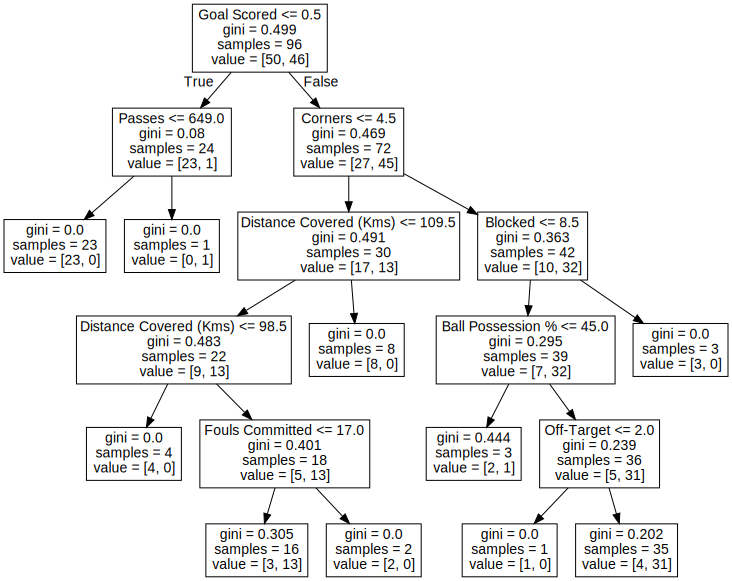

In [9]:
from sklearn import tree
import graphviz

tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=features)
graphviz.Source(tree_graph)

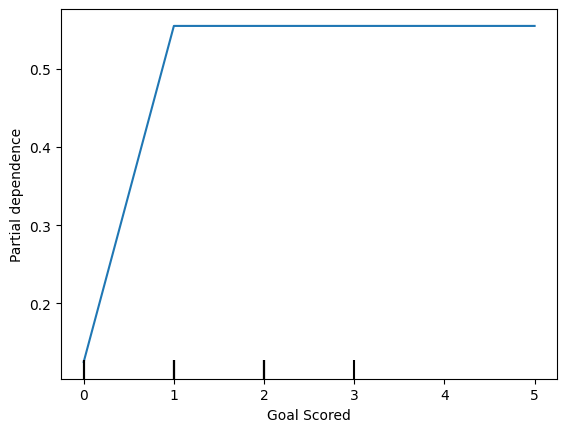

In [14]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

disp1 = PartialDependenceDisplay.from_estimator(tree_model, val_X, ['Goal Scored'])
plt.show()

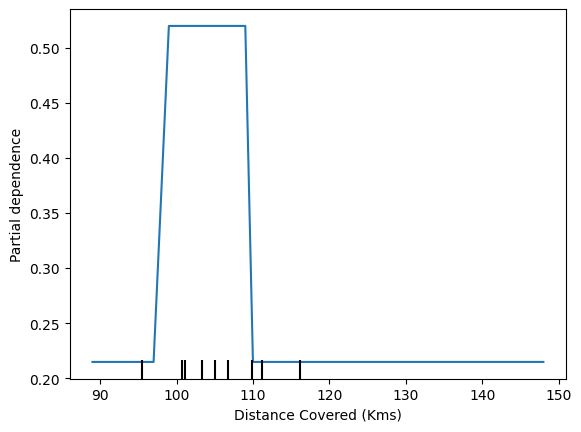

In [18]:
features_for_plot = 'Distance Covered (Kms)'
disp2 = PartialDependenceDisplay.from_estimator(tree_model, val_X, [features_for_plot])
plt.show()

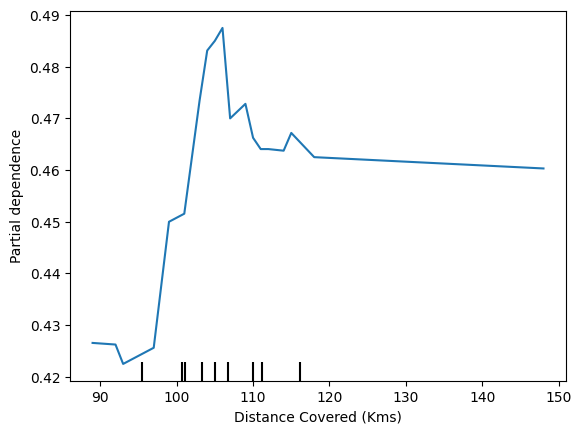

In [20]:
rf_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
disp3 = PartialDependenceDisplay.from_estimator(rf_model, val_X, [features_for_plot])
plt.show()

**2D Partial Dependence Plots**

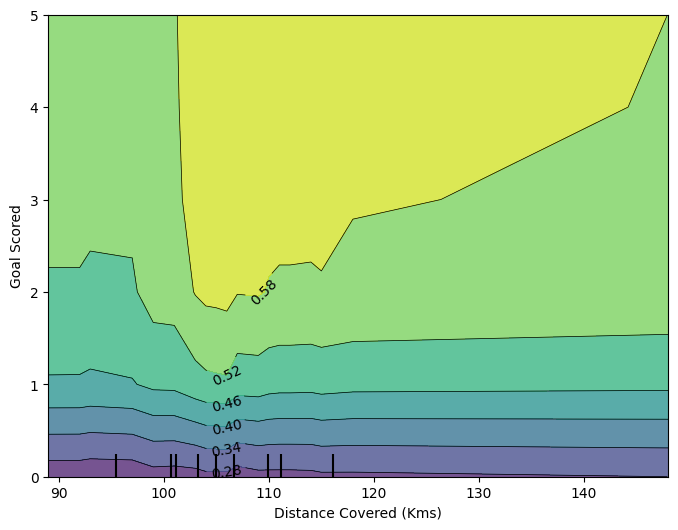

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
features_for_plot = [('Distance Covered (Kms)', 'Goal Scored')]
disp4 = PartialDependenceDisplay.from_estimator(rf_model, val_X, features_for_plot, ax=ax)
plt.show()